In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


# Load and Inspect the Dataset

| **Column Name**     | **Description**                                |
|----------------------|-----------------------------------------------|
| `date`              | Date of the record in `YYYY-MM-DD` format.    |
| `Interest_Rate`     | The prevailing interest rate (%).             |
| `Inflation`         | Inflation rate (%).                           |
| `GDP`               | Gross Domestic Product (in millions).         |
| `Unemployment`      | Unemployment rate (%).                        |
| `Ind_Prod`          | Industrial production index.                  |
| `sp500`             | S&P 500 index values (stock market indicator).|


In [21]:
# Load the uploaded CSV file to check its structure and content
file_path = 'US_Financial_data.csv'
data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
data_info = data.info()
data_head = data.head()

data_info, data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           599 non-null    object 
 1   Interest_Rate  599 non-null    float64
 2   Inflation      599 non-null    float64
 3   GDP            599 non-null    float64
 4   Unemployment   599 non-null    float64
 5   Ind_Prod       599 non-null    float64
 6   sp500          599 non-null    float64
dtypes: float64(6), object(1)
memory usage: 32.9+ KB


(None,
          date  Interest_Rate  Inflation       GDP  Unemployment  Ind_Prod  \
 0  1974-12-01           8.53       51.9  6030.464           7.2   41.9503   
 1  1975-01-01           7.13       52.3  5957.035           8.1   41.3689   
 2  1975-02-01           6.24       52.6  5957.035           8.1   40.4252   
 3  1975-03-01           5.54       52.8  5957.035           8.6   39.9804   
 4  1975-04-01           5.49       53.0  5999.610           8.8   40.0572   
 
        sp500  
 0  67.169375  
 1  72.564091  
 2  80.096842  
 3  83.831999  
 4  84.723182  )

In [22]:
# Check for missing values and basic statistics
missing_values = data.isnull().sum()
summary_statistics = data.describe()

missing_values, summary_statistics


(date             0
 Interest_Rate    0
 Inflation        0
 GDP              0
 Unemployment     0
 Ind_Prod         0
 sp500            0
 dtype: int64,
        Interest_Rate   Inflation           GDP  Unemployment    Ind_Prod  \
 count     599.000000  599.000000    599.000000    599.000000  599.000000   
 mean        4.699349  171.372102  13606.460778      6.165442   78.521635   
 std         3.922238   68.197281   4981.893041      1.770576   20.921012   
 min         0.050000   51.900000   5957.035000      3.400000   39.940200   
 25%         1.215000  113.250000   9083.256000      4.800000   57.696300   
 50%         4.830000  168.400000  13827.980000      5.800000   87.580900   
 75%         6.570000  228.651500  17444.525000      7.300000   98.649300   
 max        19.100000  315.454000  23386.248000     14.800000  104.103800   
 
              sp500  
 count   599.000000  
 mean   1218.099381  
 std    1233.425973  
 min      67.169375  
 25%     260.371749  
 50%     987.99523

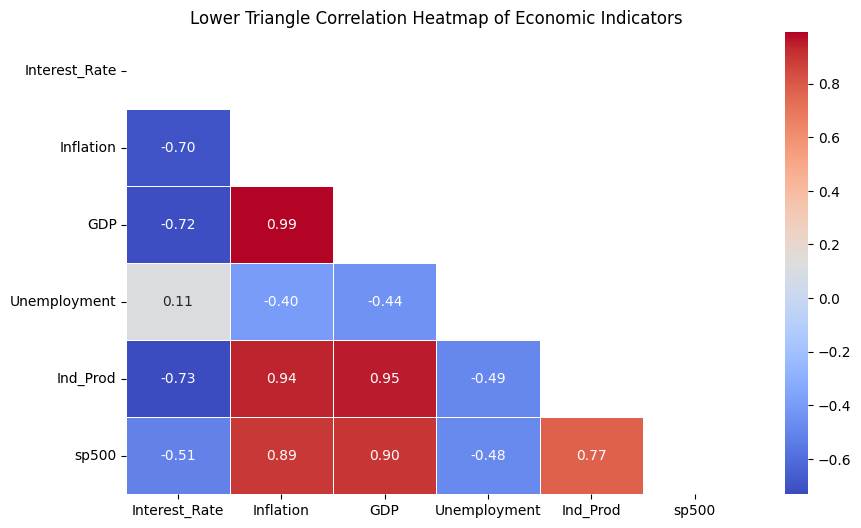

In [23]:
# Creating the DataFrame
df = data.drop(columns=['date'])

# Compute the correlation matrix
correlation_matrix_full = df.corr()

# Mask the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix_full, dtype=bool))

# Plot the heatmap with the mask
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_full, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title("Lower Triangle Correlation Heatmap of Economic Indicators")
plt.show()


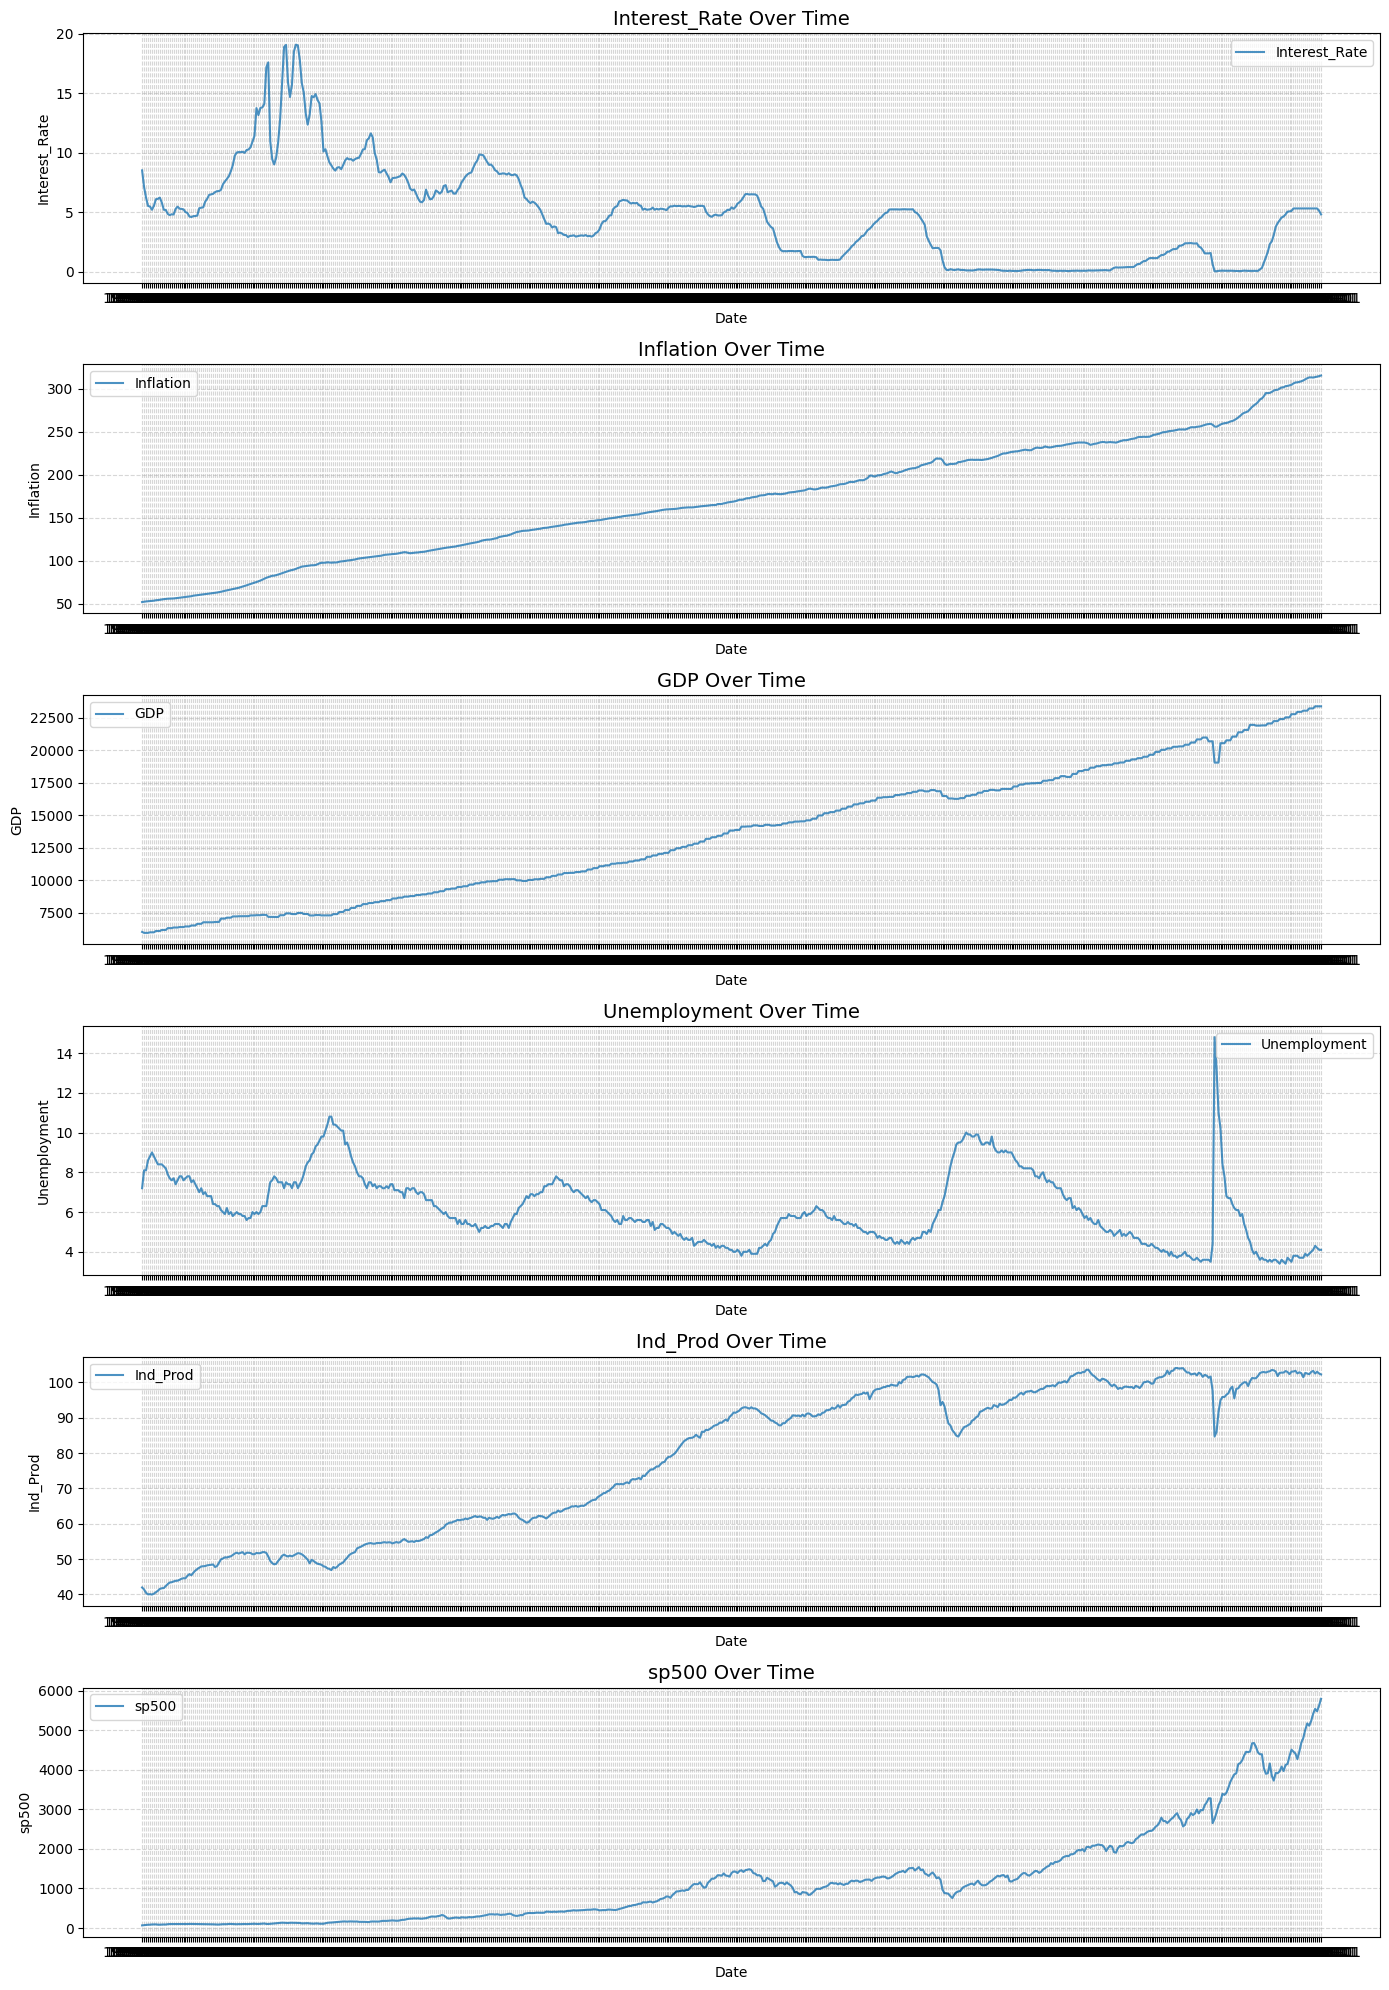

In [24]:
# List of variables to plot (excluding the date column)
variables = ['Interest_Rate', 'Inflation', 'GDP', 'Unemployment', 'Ind_Prod', 'sp500']

# Create subplots
plt.figure(figsize=(14, 20))
for i, var in enumerate(variables, start=1):
    plt.subplot(len(variables), 1, i)
    plt.plot(data['date'], data[var], label=var, alpha=0.8)
    plt.title(f'{var} Over Time', fontsize=14)
    plt.xlabel('Date', fontsize=10)
    plt.ylabel(var, fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()

plt.tight_layout()
plt.show()


# Multiple Linear Regression
Predicting `sp500` Using Economic Indicators

In [25]:
# Define the dependent variable (sp500) and independent variables
X = data[['Interest_Rate', 'Inflation', 'GDP', 'Unemployment', 'Ind_Prod']]
y = data['sp500']

# Add a constant term to the predictors for the intercept
X_added = sm.add_constant(X)

In [26]:
X_added

,const,Interest_Rate,Inflation,GDP,Unemployment,Ind_Prod
0,1.0,8.53,51.900,6030.464,7.2,41.9503
1,1.0,7.13,52.300,5957.035,8.1,41.3689
2,1.0,6.24,52.600,5957.035,8.1,40.4252
3,1.0,5.54,52.800,5957.035,8.6,39.9804
4,1.0,5.49,53.000,5999.610,8.8,40.0572
...,...,...,...,...,...,...
594,1.0,5.33,313.049,23223.906,4.1,103.2768
595,1.0,5.33,313.534,23386.248,4.3,102.5381
596,1.0,5.33,314.121,23386.248,4.2,103.0449
597,1.0,5.13,314.686,23386.248,4.1,102.5497


In [27]:
# Fit the Multiple Linear Regression model
mlr_model = sm.OLS(y, X_added).fit()

# Display the regression results
print(mlr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sp500   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1877.
Date:                Tue, 17 Dec 2024   Prob (F-statistic):               0.00
Time:                        23:03:57   Log-Likelihood:                -4267.4
No. Observations:                 599   AIC:                             8547.
Df Residuals:                     593   BIC:                             8573.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            56.8838    160.274      0.355

# Residuals vs. Fitted Values

In [28]:
pred_data = pd.DataFrame()

# Get the fitted values and residuals
pred_data['actual_vals'] = y  # Actual values of sp500
pred_data['fitted_vals'] = mlr_model.fittedvalues  # Predicted values of sp500
pred_data['residuals'] = mlr_model.resid

# Preview the new table
print(pred_data.head())

   actual_vals  fitted_vals   residuals
0    67.169375     5.035450   62.133925
1    72.564091  -156.271097  228.835188
2    80.096842  -133.448406  213.545248
3    83.831999  -189.698479  273.530478
4    84.723182  -196.317641  281.040823


Plot Inspection: If the residuals show a pattern (e.g., funnel shape), it suggests heteroskedasticity.

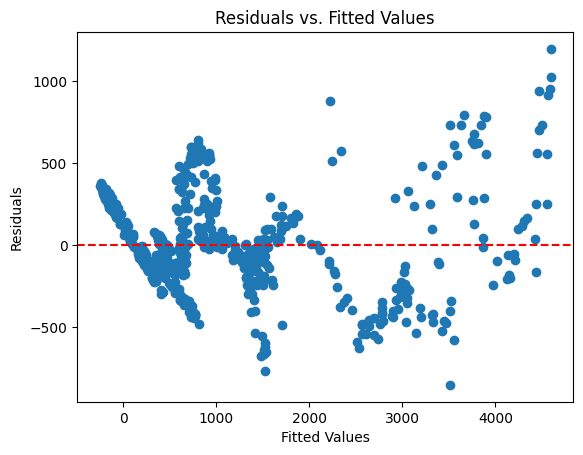

In [29]:
# Create the plot
plt.scatter(pred_data['fitted_vals'], pred_data['residuals'])
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [30]:
pred_summary = pred_data.describe()
print(pred_summary)

       actual_vals  fitted_vals     residuals
count   599.000000   599.000000  5.990000e+02
mean   1218.099381  1218.099381 -5.699146e-11
std    1233.425973  1196.205219  3.007203e+02
min      67.169375  -254.352913 -8.552154e+02
25%     260.371749   381.037916 -1.679534e+02
50%     987.995239   803.310805 -3.343968e+01
75%    1470.528250  1523.100996  1.764849e+02
max    5792.319548  4594.433456  1.197886e+03


# Address Heteroskedasticity (if present)
The Goldfeld-Quandt test is used to detect heteroscedasticity (non-constant variance) in regression models. The Goldfeld-Quandt test splits the data into two subsets and compares the variances of residuals in each subset.

In [31]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

# Perform the Goldfeld-Quandt test
# 'split' determines where the data is split (default is 40%-60%)
gq_test = het_goldfeldquandt(mlr_model.resid, X_added)

# gq_test returns a tuple: (F-statistic, p-value, number of observations in each group)
print('Goldfeld-Quandt F-statistic:', gq_test[0])
print('p-value:', gq_test[1])
print('Number of observations per group:', gq_test[2])


Goldfeld-Quandt F-statistic: 53.34977045656478
p-value: 4.877691181318901e-170
Number of observations per group: increasing


In [32]:
# Fit the model with robust standard errors
mlr_model_robust = sm.OLS(y, X_added).fit(cov_type='HC3')

# Display the regression results with robust standard errors
print(mlr_model_robust.summary())


                            OLS Regression Results                            
Dep. Variable:                  sp500   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1281.
Date:                Tue, 17 Dec 2024   Prob (F-statistic):          5.57e-315
Time:                        23:03:57   Log-Likelihood:                -4267.4
No. Observations:                 599   AIC:                             8547.
Df Residuals:                     593   BIC:                             8573.
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            56.8838    133.017      0.428

# Address Endogeneity (if present)

If the covariance values are close to zero, it suggests that the independent variables are exogenous. If the values are significantly different from zero, it indicates potential endogeneity.

In [33]:
residuals = pred_data['residuals']

# Calculate covariance between residuals and each independent variable
cov_matrix = data[['Interest_Rate', 'Inflation', 'GDP', 'Unemployment', 'Ind_Prod']].apply(lambda x: np.cov(residuals, x)[0, 1])

# Print the covariance values
print(cov_matrix)


Interest_Rate    4.842527e-12
Inflation       -8.261984e-10
GDP             -5.900349e-08
Unemployment     1.265384e-11
Ind_Prod        -2.203471e-10
dtype: float64


# Test for Normality

### Jarque-Bera Test

The Jarque-Bera test checks whether the residuals from your regression model are normally distributed.

- **Test Statistic**: This value measures the deviation of the sample skewness and kurtosis from those of a normal distribution.
- **p-value**: This tells you the probability that the residuals are normally distributed.

**Interpretation**:
- A higher test statistic indicates a greater deviation from normality. If the **test statistic** is **significantly large**, it suggests that the residuals are not normally distributed.
- If the **p-value** is **greater than 0.05**, you fail to reject the null hypothesis, which means the residuals are normally distributed.


In [34]:
import scipy.stats as stats

# Calculate residuals
residuals = mlr_model.resid

# Perform the Jarque-Bera test
jb_test = stats.jarque_bera(residuals)

# Print the test statistic and p-value
print('Jarque-Bera test statistic:', jb_test[0])
print('p-value:', jb_test[1])


Jarque-Bera test statistic: 41.22471916116656
p-value: 1.1172901631016794e-09


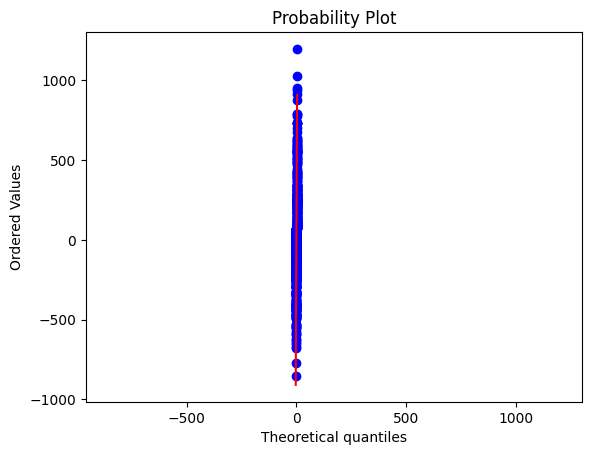

In [35]:

# Histogram of residuals
plt.hist(mlr_model.resid, bins=30, density=True)
stats.probplot(mlr_model.resid, dist="norm", plot=plt)
plt.show()


### Chow Test

The Chow test is used to determine whether there is a structural break at a certain point in your data. This is useful if you suspect that the relationship between the dependent and independent variables changes at some point.

- **Test Statistic**: This value measures the difference between the two sub-samples.
- **p-value**: This tells you the probability that there is no structural break.

**Interpretation**:
- A higher test statistic indicates a greater likelihood of a structural break in the data. If the **test statistic** is **significantly large**, it suggests that there is a structural break in the relationship between the dependent and independent variables.
- If the **p-value** is **greater than 0.05**, you fail to reject the null hypothesis, which means there is no structural break.


In [36]:
from statsmodels.stats.diagnostic import breaks_cusumolsresid

# Perform the Chow test
chow_test = breaks_cusumolsresid(residuals, ddof = 1)

# Print the test statistic and p-value
print('Chow test statistic:', chow_test[0])
print('p-value:', chow_test[1])


Chow test statistic: 2.9557153621036067
p-value: 5.161985647932636e-08


# Linear Regression

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Prepare the data
X = data[['Interest_Rate', 'Inflation', 'GDP', 'Unemployment', 'Ind_Prod']]
y = data['sp500']

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = model.predict(X_test)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))


Coefficients: [  42.52568533   -5.96848009    0.55003883 -106.49840845  -60.23745886]
Intercept: -57.001475517560266
Mean Squared Error: 110679.26339760891
R-squared: 0.9469589186495594
